In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew


In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize']=(12,8)

In [5]:
data = pd.read_csv("C:\\Users\\sarav\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")

In [9]:
data.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [10]:
data.shape

(1460, 81)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

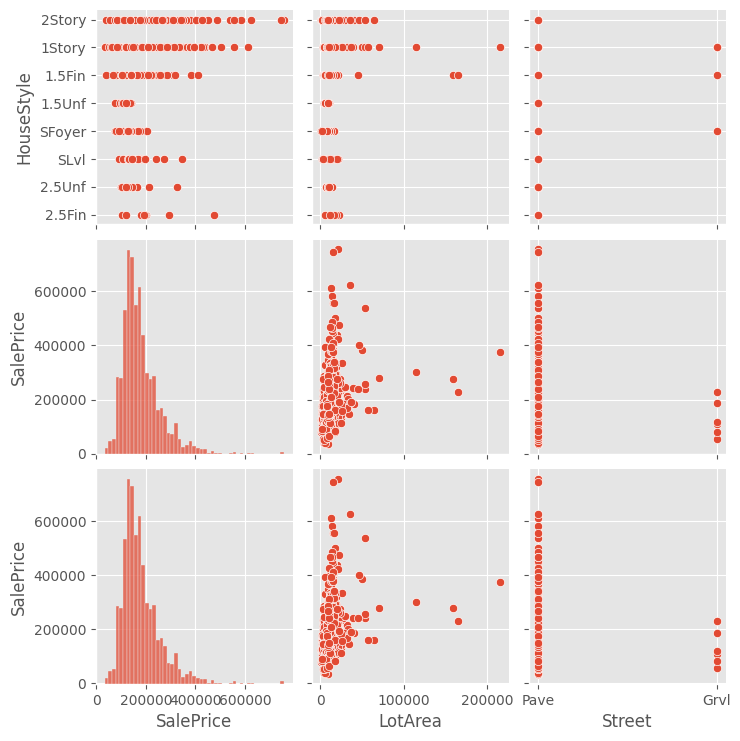

In [12]:
sns.pairplot(data,x_vars=['SalePrice','LotArea','Street'],y_vars=['HouseStyle','SalePrice','SalePrice'])

<Axes: >

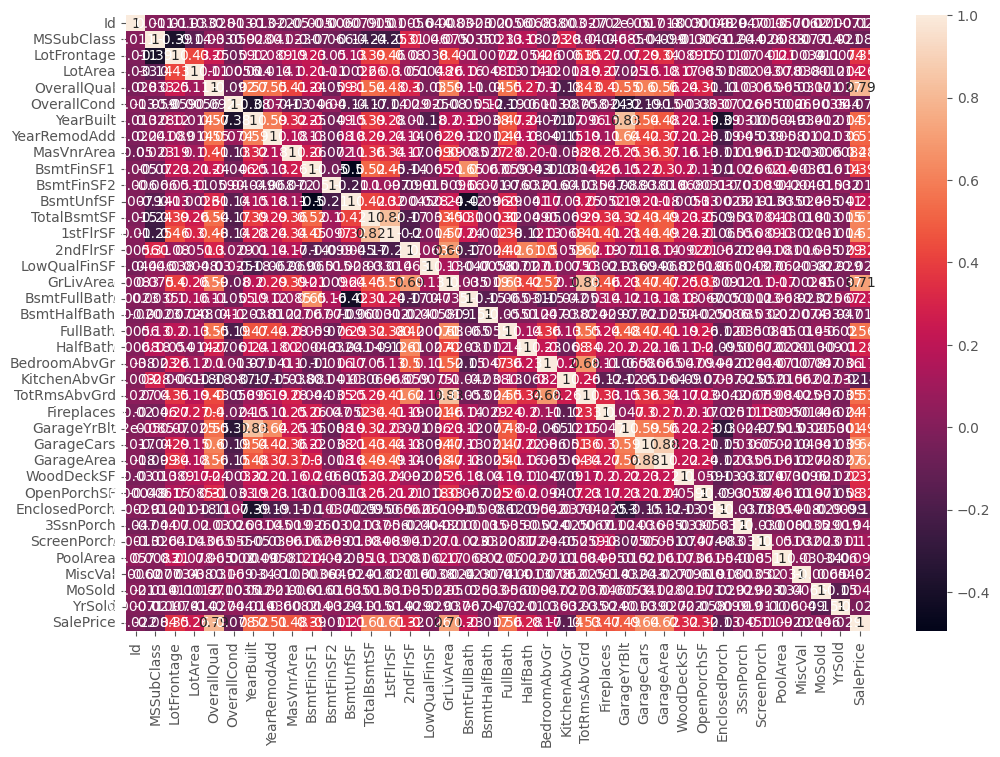

In [15]:
sns.heatmap(data.corr(numeric_only = True),annot=True)

In [18]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'data' is your DataFrame
# Perform one-hot encoding on categorical variables
x = pd.get_dummies(data[['LotShape', 'LotArea', 'Street']], drop_first=True)

# y remains as the target variable
y = data['SalePrice']

# Initialize and fit the model
model = LinearRegression()
model.fit(x, y)

# Print the intercept and coefficients
print("Intercept =", model.intercept_)
print("Coefficients =", model.coef_)

# Display the feature names and their corresponding coefficients
print(list(zip(x.columns, model.coef_)))


Intercept = 72452.70501845238
Coefficients = [ 1.92107710e+00  1.34664553e+04 -4.68580924e+04 -3.52990230e+04
  1.11028018e+05]
[('LotArea', 1.9210770961393715), ('LotShape_IR2', 13466.455295101197), ('LotShape_IR3', -46858.092394906045), ('LotShape_Reg', -35299.02303018581), ('Street_Pave', 111028.0181608251)]


In [19]:
xl=list(x)
data[xl].corr()

KeyError: "['LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'Street_Pave'] not in index"

In [28]:
new_data = pd.DataFrame([["Reg", 32000, "Pave"]], columns=['LotShape', 'LotArea', 'Street'])

# Apply the same one-hot encoding on the new data
new_data_encoded = pd.get_dummies(new_data, drop_first=True)

# Ensure the new data has the same columns as the training data (add missing columns if any)
new_data_encoded = new_data_encoded.reindex(columns=x.columns, fill_value=0)

# Now make the prediction
pred = model.predict(new_data_encoded)

# Print the prediction
print(pred)

[133927.17209491]
